In [54]:
import pandas as pd
from pathlib import Path

pq_path = Path("../data_processed/movies_clean.parquet")
df = pd.read_parquet(pq_path)

df.shape, df.head()

((4919, 29),
    color           director  num_critic_for_reviews  runtime_min  \
 0  Color      James Cameron                   723.0        178.0   
 1  Color     Gore Verbinski                   302.0        169.0   
 2  Color         Sam Mendes                   602.0        148.0   
 3  Color  Christopher Nolan                   813.0        164.0   
 4    nan        Doug Walker                     NaN          NaN   
 
    director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
 0                      0.0                   855.0  Joel David Moore   
 1                    563.0                  1000.0     Orlando Bloom   
 2                      0.0                   161.0      Rory Kinnear   
 3                  22000.0                 23000.0    Christian Bale   
 4                    131.0                     NaN        Rob Walker   
 
    actor_1_facebook_likes    gross_usd                           genres  ...  \
 0                  1000.0  760505847.0  Action|Ad

In [55]:
df.info()
df.isna().mean().sort_values(ascending = False).head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4919 entries, 0 to 4918
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4919 non-null   object 
 1   director                   4919 non-null   object 
 2   num_critic_for_reviews     4870 non-null   float64
 3   runtime_min                4904 non-null   float64
 4   director_facebook_likes    4817 non-null   float64
 5   actor_3_facebook_likes     4896 non-null   float64
 6   actor_2_name               4919 non-null   object 
 7   actor_1_facebook_likes     4912 non-null   float64
 8   gross_usd                  4056 non-null   float64
 9   genres                     4919 non-null   object 
 10  actor_1_name               4919 non-null   object 
 11  title                      4919 non-null   object 
 12  num_voted_users            4919 non-null   int64  
 13  cast_total_facebook_likes  4919 non-null   int64

gross_usd                  0.175442
budget_usd                 0.098597
aspect_ratio               0.066274
year                       0.021549
decade                     0.021549
director_facebook_likes    0.020736
num_critic_for_reviews     0.009961
actor_3_facebook_likes     0.004676
num_user_for_reviews       0.004269
runtime_min                0.003049
actor_2_facebook_likes     0.002643
facenumber_in_poster       0.002643
actor_1_facebook_likes     0.001423
movie_facebook_likes       0.000000
rating                     0.000000
dtype: float64

In [56]:
na_summary = (
    df.isna().sum()
        .to_frame("missing_count")
        .assign(missing_pct = lambda t: (t["missing_count"] / len(df)).round(3))
        .sort_values("missing_count", ascending = False)
)
na_summary

,missing_count,missing_pct
gross_usd,863,0.175
budget_usd,485,0.099
aspect_ratio,326,0.066
year,106,0.022
decade,106,0.022
director_facebook_likes,102,0.021
num_critic_for_reviews,49,0.010
actor_3_facebook_likes,23,0.005
num_user_for_reviews,21,0.004
runtime_min,15,0.003


In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4870.0,138.010267,120.253857,1.0,49.0,108.0,191.0,813.0
runtime_min,4904.0,107.089111,25.278583,7.0,93.0,103.0,118.0,511.0
director_facebook_likes,4817.0,690.705418,2832.107042,0.0,7.0,48.0,190.0,23000.0
actor_3_facebook_likes,4896.0,630.961397,1625.428769,0.0,132.0,365.5,633.0,23000.0
actor_1_facebook_likes,4912.0,6490.875814,15103.081835,0.0,607.0,982.0,11000.0,640000.0
gross_usd,4056.0,47621564.115385,67363868.561038,162.0,5008728.5,25035665.0,61099406.25,760505847.0
num_voted_users,4919.0,82618.197601,138285.846961,5.0,8356.5,33158.0,93757.5,1689764.0
cast_total_facebook_likes,4919.0,9574.645863,18159.99229,0.0,1394.0,3044.0,13611.5,656730.0
facenumber_in_poster,4906.0,1.376478,2.023493,0.0,0.0,1.0,2.0,43.0
num_user_for_reviews,4898.0,267.603512,372.839155,1.0,64.0,153.5,320.0,5060.0


In [58]:
data_dict = pd.DataFrame({
    "column": df.columns,
    "dtype": df.dtypes.astype(str).values,
    "pct_missing": [df[c].isna().mean() 
    for c in df.columns]
})
data_dict

,column,dtype,pct_missing
0,color,object,0.000000
1,director,object,0.000000
2,num_critic_for_reviews,float64,0.009961
3,runtime_min,float64,0.003049
4,director_facebook_likes,float64,0.020736
5,actor_3_facebook_likes,float64,0.004676
6,actor_2_name,object,0.000000
7,actor_1_facebook_likes,float64,0.001423
8,gross_usd,float64,0.175442
9,genres,object,0.000000


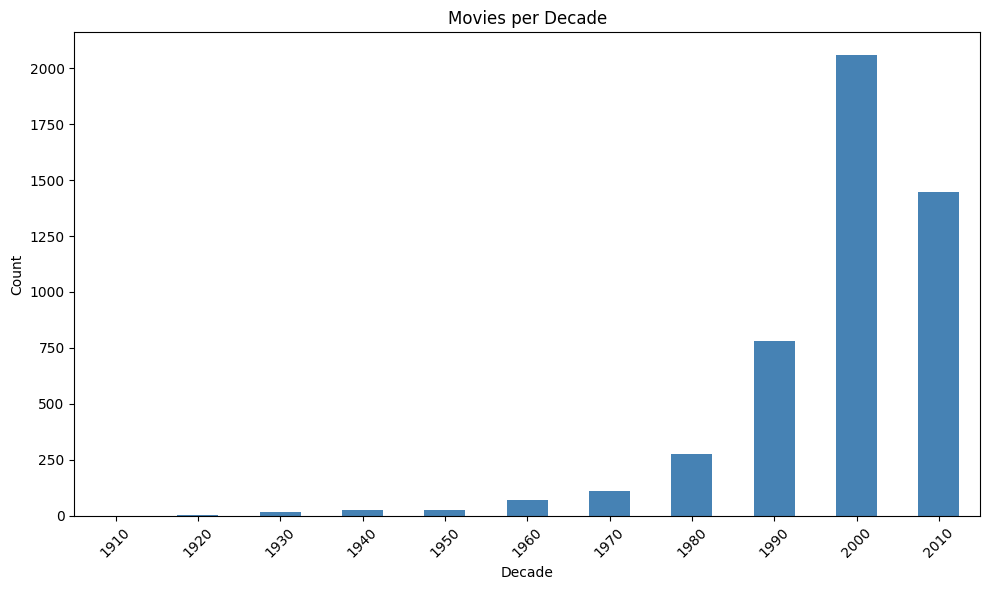

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
df['decade'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title("Movies per Decade")
plt.xlabel("Decade"); plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig("../visuals/movies_per_decade.png", dpi = 300, bbox_inches = "tight")
plt.show()


## Chart 1: Movies per Decade (Without Labels)
The above bar chart shows the distribution of movies across decades. By plotting counts without value labels, the focus stays on the overall trend - a sharp increase in movie producion starting in the 1980's, peaking in the 2000's. This version is cleaner for scanning the big picture quickly.

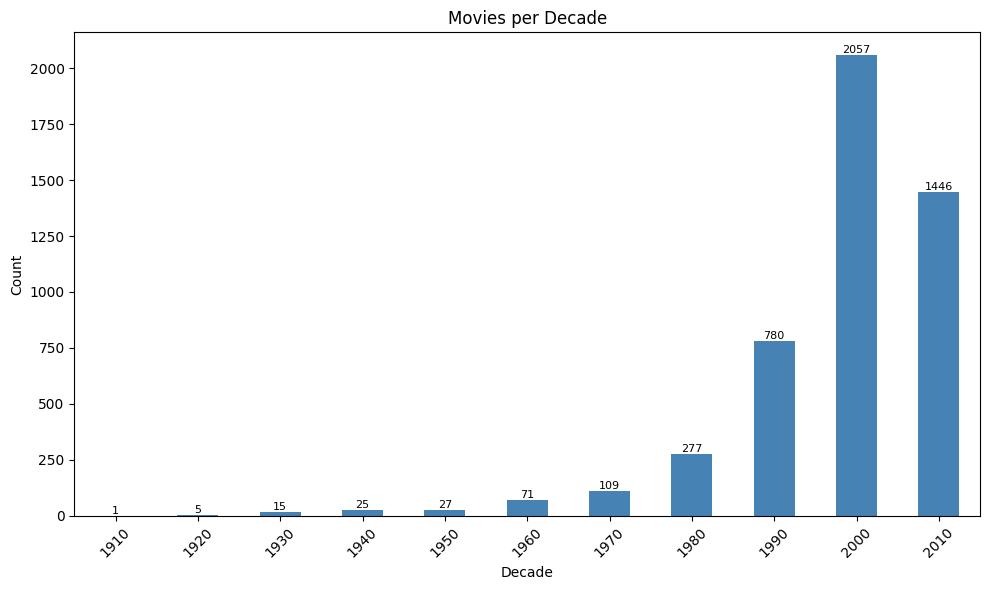

In [60]:
plt.figure(figsize = (10, 6))
ax = (
    df['decade']
      .value_counts()
      .sort_index()
      .plot(kind='bar', color='steelblue')
)

plt.title("Movies per Decade")
plt.xlabel("Decade")
plt.ylabel("Count")

for p in ax.patches:
    h = p.get_height()
    ax.annotate(
        f"{int(h)}",
        (p.get_x() + p.get_width()/2, h),
        ha = 'center', va = 'bottom', fontsize = 8, color = 'black'
    )

plt.xticks(rotation = 45)
plt.tight_layout()

plt.savefig("../visuals/movies_per_decade_labeled.png", dpi = 300, bbox_inches = "tight")
plt.show()


## Chart 2: Movies per Decade (With Labels)
The chart version above includes value labels above each bar, making the exact counts visible. While slightly busier visually, it helps stakeholders quickly reference numbers without estimating from the y-axis. Using both versions demonstrates flexibiity in tailoring visuals for exploratory analysis vs. presentation needs. 

genres
Drama        2535
Comedy       1848
Thriller     1364
Action       1113
Romance      1084
Adventure     888
Crime         869
Sci-Fi        595
Fantasy       583
Horror        540
Name: count, dtype: int64

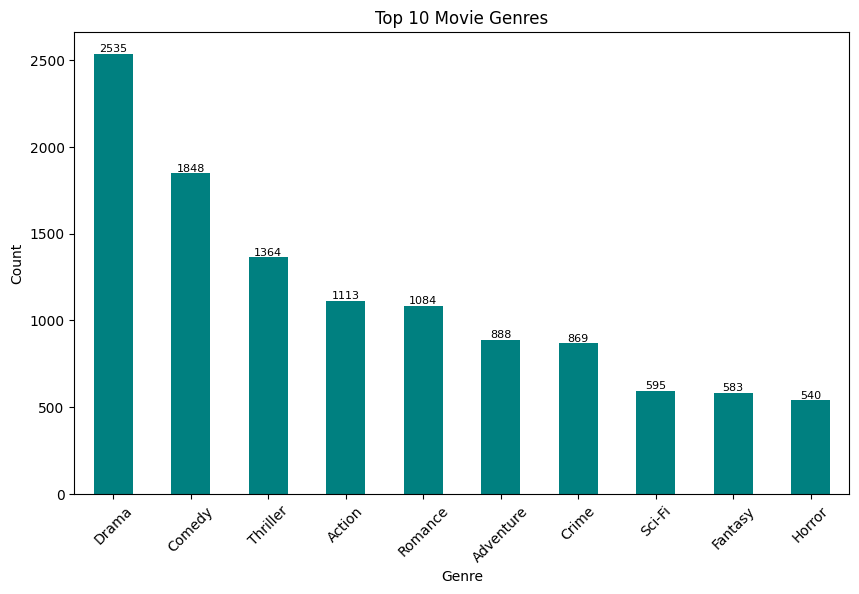

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

def add_value_labels(ax, fontsize=8):
    for p in ax.patches:
        ax.annotate(
            f"{int(p.get_height())}",
            (p.get_x() + p.get_width()/2, p.get_height()),
            ha="center", va="bottom", fontsize=fontsize
        )

g = (
    df['genres']
      .astype(str)         # string
      .str.strip()
      .replace({'': pd.NA, 'nan': pd.NA, 'None': pd.NA})
)

delim = '|' if g.str.contains(r'\|', na=False).any() else ','

genre_long = (
    g.dropna()
     .str.split(delim)
     .explode()
     .str.strip()
)
genre_long = genre_long[genre_long.notna() & (genre_long != '')]

top_genres = genre_long.value_counts().head(10)
display(top_genres)  # quick sanity check table

plt.figure(figsize=(10,6))
ax = top_genres.plot(kind='bar', color='teal')
plt.title("Top 10 Movie Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
add_value_labels(ax)
plt.savefig("../visuals/top_genres.png", dpi = 300, bbox_inches = "tight")
plt.show()


## Chart 3: Top 10 Most Common Genres
The above chart shows the distribution of the top 10 most common movie genres in the dataset. *Drama* dominates by a wide margin, followed by *Comedy*, *Thriller*, and *Action*. Genres like *Sci-Fi*, *Fantasy*, and *Horror* appear less frequently. This breakdown higlights the strong industry emphasis on story-driven genres (Drama/Comedy), while niche categories remain under-represented. 

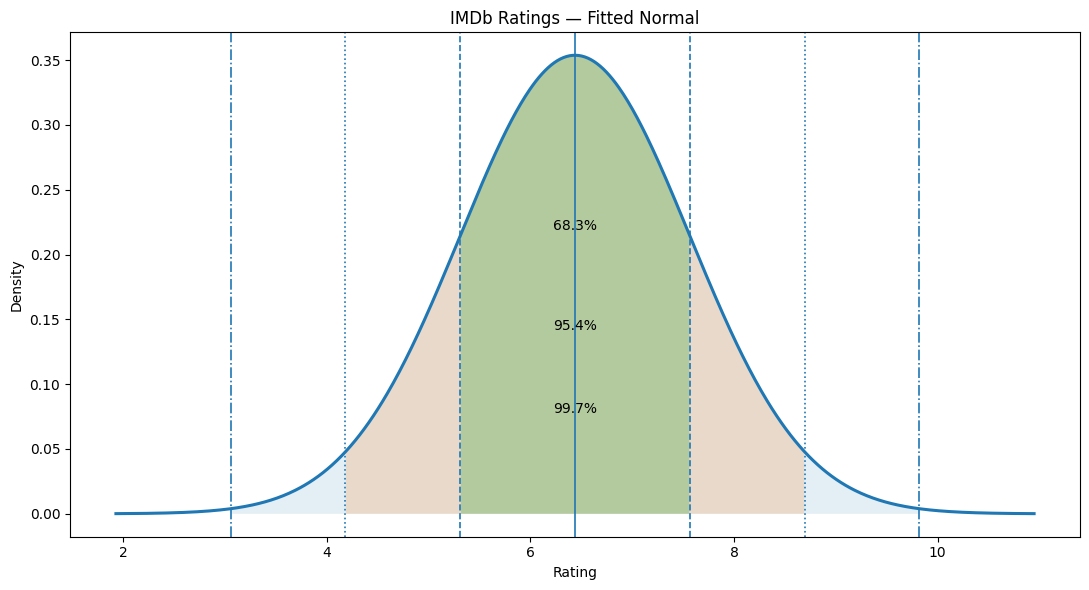

In [62]:
import numpy as np
from math import erf, sqrt

s = pd.to_numeric(df['rating'], errors='coerce').dropna()
s = s[(s >= 0) & (s <= 10)]
mu, sigma = s.mean(), s.std(ddof=1)

xs = np.linspace(mu - 4*sigma, mu + 4*sigma, 600)
pdf = (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-0.5*((xs-mu)/sigma)**2)


def cdf(x): return 0.5*(1 + erf((x-mu)/(sigma*sqrt(2))))

# figure
plt.figure(figsize = (11,6))


for k, alpha in zip([3,2,1], [0.12, 0.18, 0.28]): 
    lo, hi = mu - k*sigma, mu + k*sigma
    plt.fill_between(xs, 0, pdf, where = (xs>=lo)&(xs<=hi), alpha = alpha)

plt.plot(xs, pdf, linewidth = 2.2)
for x, style in [(mu,'-'), (mu-sigma,'--'), (mu+sigma,'--'),
                 (mu-2*sigma,':'), (mu+2*sigma,':'),
                 (mu-3*sigma,'-.') , (mu+3*sigma,'-.')]:
    plt.axvline(x, linestyle = style, linewidth = 1.2)

ymax = pdf.max()
p1 = cdf(mu+sigma) - cdf(mu-sigma)
p2 = cdf(mu+2*sigma) - cdf(mu-2*sigma)
p3 = cdf(mu+3*sigma) - cdf(mu-3*sigma)
plt.text(mu, ymax*0.62, f"{p1*100:.1f}%", ha = 'center')
plt.text(mu, ymax*0.40, f"{p2*100:.1f}%", ha = 'center')
plt.text(mu, ymax*0.22, f"{p3*100:.1f}%", ha = 'center')

plt.title("IMDb Ratings — Fitted Normal")
plt.xlabel("Rating"); plt.ylabel("Density")
plt.tight_layout()
plt.savefig("../visuals/ratings_normal_curve.png", dpi = 300, bbox_inches = "tight")
plt.show()

## Chart 4: Normal Distribution of IMDb Ratings
The above bell-shaped curve shows how IMDb ratings roughly follow a normal distribution. About 68% of movies fall within one standard versin of the mean rating (~6-7), 95% within two standard deviations (~5-8), and 99.7% within three (~4-9). This illustrates the 68-95-99.7 rule, confirming that most ratings cluster near the average, with fewer movies receiving very low or very high ratings. 

In [63]:
actor_cols = [c for c in df.columns if "actor" in c and c.endswith("_name")]
actors_long = (
    df[actor_cols]
        .melt(value_name = "actor", var_name = "slot")
        .dropna(subset = ["actor"])
)

top_actors = (
    actors_long["actor"]
    .value_counts()
    .head(20)
    .rename_axis("actor")
    .reset_index(name = "film_count")
)
top_actors

,actor,film_count
0,Robert De Niro,53
1,Morgan Freeman,43
2,nan,43
3,Bruce Willis,38
4,Matt Damon,37
5,Johnny Depp,36
6,Steve Buscemi,36
7,Brad Pitt,33
8,Nicolas Cage,33
9,Will Ferrell,32


In [64]:
from pathlib import Path

fig_dir = Path("figures")
fig_dir.mkdir(parents = True, exist_ok = True)
out_file = fig_dir / "top_actors_by_count.png"

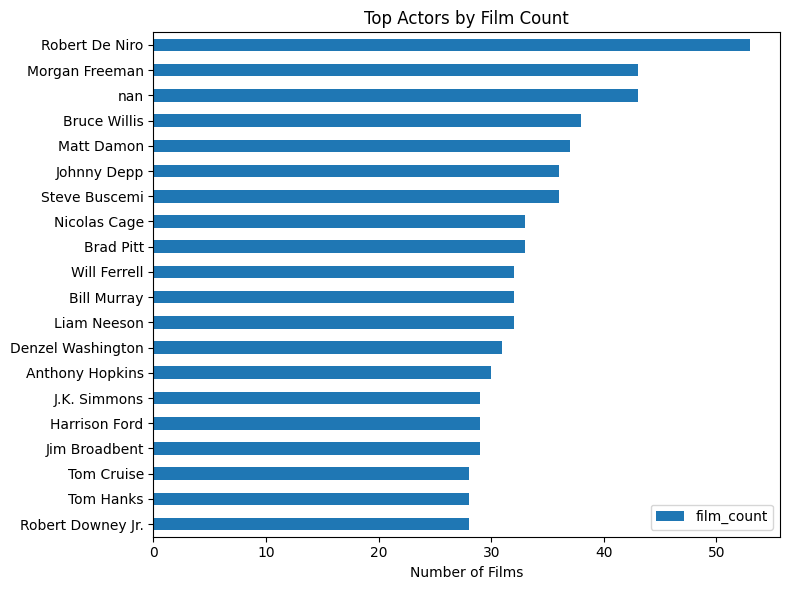

In [65]:
ax = top_actors.sort_values("film_count").plot(kind = "barh", x = "actor", y = "film_count", figsize = (8, 6))
ax.set_xlabel("Number of Films")
ax.set_ylabel("")
ax.set_title("Top Actors by Film Count")
plt.tight_layout()
plt.savefig("figures/top_actors_by_count.png", dpi = 200)
plt.show()

## Chart 5: Top Actors by Film Count
The chart above highlights the actors appearing in the most films within the dataset. Robert DeNiro and Morgan Freeman stand out as highly prolific actors, along with other well-known names like Bruce Willis and Matt Damon. This gives us a quick sense of which performers dominate the dataset and could influence rating or revenue trends. 

## Column Discovery
To handle column name variations, I started scanning for keywords like year, release, and rating. This quick diagnostic shows which columns are potential matches. From there, I used more robust logic to finalize which column(s) to use. 

In [66]:
[c for c in df.columns if any(k in c.lower() for k in ["year", "date", "release", "score", "rating"])]

['content_rating', 'year', 'rating']

## Column Detection
The step below ensures the correct year and ratings columns are selected, even if the dataset uses slightly different names. Using a helper function tests candidate names, confirming the ones available in the dataset. This adds flexibility to the pipeline. 

In [67]:
def pick_col(candidates):
    for cand in candidates:
        if cand in df.columns:
            return cand
        
    for cand in candidates:
        for col in df.columns:
            if col.lower() == cand.lower():
                return col
    
    return None

year_col = pick_col(["title_year", "year", "release_year", "movie_year", "year_released"])
rating_col = pick_col(["imdb_score", "imdb_rating", "rating", "score"])

print("Using columns → year:", year_col, "| rating:", rating_col)
assert year_col is not None and rating_col is not None, "Could not find suitable year/rating columns."

Using columns → year: year | rating: rating


## Average IMDb Ratings by Year
After detecting the year and rating columns, the data is cleaned and average IMDb ratings per year are calculated. This provides a long-term view of rating trends across decades of film history. 

In [81]:
tmp = df[[year_col, rating_col]].copy()

tmp[year_col] = pd.to_numeric(tmp[year_col], errors = "coerce")
tmp[rating_col] = pd.to_numeric(tmp[rating_col], errors = "coerce")

ratings_by_year = (
    tmp.dropna(subset = [year_col, rating_col])
        .groupby(year_col, as_index = False)[rating_col].mean()
        .rename(columns = {year_col: "year", rating_col: "avg_rating"})
        .sort_values("year")
)
ratings_by_year.head()

,year,avg_rating
0,1916.0,8.00
1,1920.0,4.80
2,1925.0,8.30
3,1927.0,8.30
4,1929.0,7.15


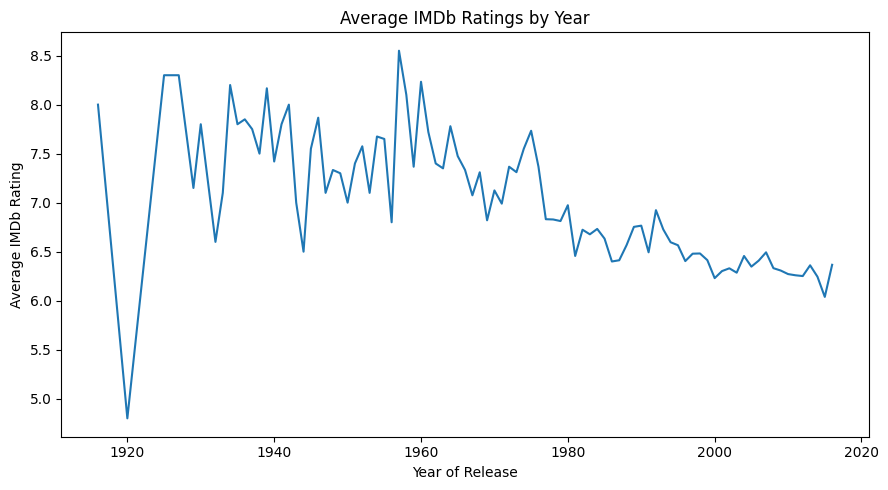

In [82]:
fig_dir = Path("figures"); fig_dir.mkdir(exist_ok = True, parents = True)
out_file = fig_dir / "avg_rating_by_year.png"

plt.figure(figsize = (9, 5))
plt.plot(ratings_by_year["year"], ratings_by_year["avg_rating"])
plt.xlabel("Year of Release")
plt.ylabel("Average IMDb Rating")
plt.title("Average IMDb Ratings by Year")
plt.tight_layout()
plt.savefig(out_file, dpi = 200, bbox_inches = "tight")
plt.show()


## Chart 6: Ratings by Year
The above chart calculates the average IMDb ratings by year without titles. It highlights how audience ratings fluctuated over time, helping to identify broader trends (e.g., whether more recent films tend to score highter or lower compared to earlier years). 

## Column Detection for Inconsistent Naming - Shown Below 
The dataset contains variations in column names (e.g., gross, gross_usd, and revenue). To make the notebook more robust and reusable, I added logic to automatically detect column names using pattern matching shown in the 3 following cells. 

I perfomed this by scanning all columns for applicable keywords, refining detection with regrex-based matching, and built a helper function to generalize the approcach. 

This ensures the pipeline still works even if column names differ slightly across datasets. 

In [70]:
# Quick scan of column names for revenue related keywords. 

[c for c in df.columns if any(k in c.lower() for k in
    ["budget","gross","revenue","income","box","world","domestic","usa","rating","score","imdb"])]

['gross_usd', 'movie_imdb_link', 'content_rating', 'budget_usd', 'rating']

In [71]:
# Regrex-based search for revenue related columns. 

import re
[c for c in df.columns if re.search(r"(gross|revenue|box[_ ]?office|world)", c, re.I)]


['gross_usd']

In [72]:
# Helper function to detect the correct revenue column automatically. 

def pick_by_regex(patterns):
    for col in df.columns:
        for pat in patterns:
            if re.search(pat, col, re.I):
                return col
    return None

revenue_col = pick_by_regex([r"gross", r"revenue", r"box[_ ]?office", r"world"])
print("Detected revenue column:", revenue_col)
assert revenue_col, "Couldn't detect a revenue/gross column—print df.columns to inspect."


Detected revenue column: gross_usd


## Correlation Analysis Below: Budget, Revenue, and Rating
To explore the potential relationships between key variables, I computed a correlation matrix. This shows how strongly **budget**, **revenue**, and **IMDb ratings** move together. In this dataset, budget and revenue show only a weak positive correlation, while ratings have very little correlation with either. 

In [73]:
import pandas as pd

num = df[[budget_col, revenue_col, rating_col]].copy()
for c in [budget_col, revenue_col, rating_col]:
    num[c] = pd.to_numeric(num[c], errors = "coerce")

num = num.dropna(subset = [budget_col, revenue_col, rating_col])

corrs = num[[budget_col, revenue_col, rating_col]].corr().round(3)
corrs


,budget_usd,gross_usd,rating
budget_usd,1.000,0.097,0.030
gross_usd,0.097,1.000,0.213
rating,0.030,0.213,1.000


## Cleaning Shown Below: Budget, Revenue & Ratings
Before analysis, I ensured numeric columns were properly converted, handled missing values, and capped extreme outliers at the 95th percentile. This step makes later visualizations such as budget vs. revenue trends more interpretable. 

In [74]:
cols = [year_col, budget_col, revenue_col, rating_col]
base = df[cols].copy()

for c in cols:
    base[c] = pd.to_numeric(base[c], errors="coerce")

base = base.dropna(subset=[year_col, budget_col, revenue_col])

cap_b = base[budget_col].quantile(0.95)
cap_r = base[revenue_col].quantile(0.95)
base_clip = base[(base[budget_col] <= cap_b) & (base[revenue_col] <= cap_r)].copy()


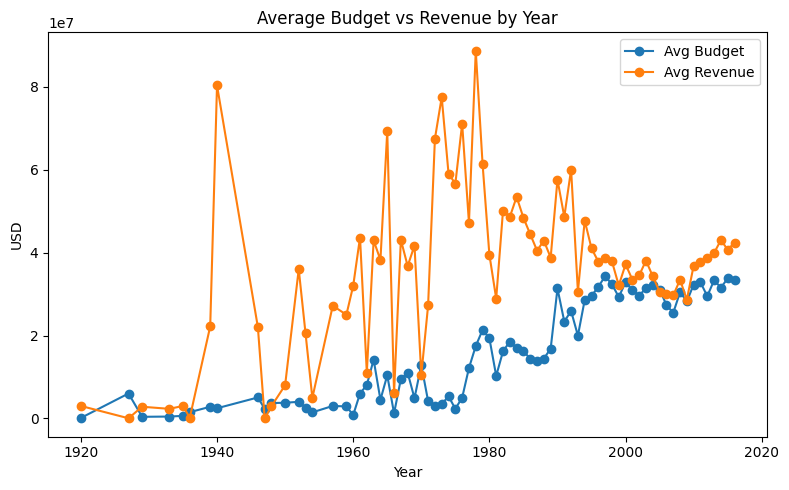

In [75]:
# Average budget & revenue by YEAR (uses base_clip which includes year)
ratings_by_year = (
    base_clip.groupby(year_col, as_index=False)[[budget_col, revenue_col]]
             .mean()
             .sort_values(year_col)
)

from pathlib import Path
import matplotlib.pyplot as plt

fig_dir = Path("figures"); fig_dir.mkdir(parents=True, exist_ok=True)

plt.figure(figsize=(8,5))
plt.plot(trend[year_col], trend[budget_col], label="Avg Budget", marker="o")
plt.plot(trend[year_col], trend[revenue_col], label="Avg Revenue", marker="o")
plt.xlabel("Year")
plt.ylabel("USD")
plt.title("Average Budget vs Revenue by Year")
plt.legend()
plt.tight_layout()
plt.savefig(fig_dir / "avg_budget_revenue_by_year.png", dpi=200, bbox_inches="tight")
plt.show()


## Chart 7: Budget vs. Revenue
The scatterplot above shows the relationship between production budget and worldwide gross revenue. As expeccted, larger budgets often correlate with highter revenue, but there are also many lower budgeted films that achieved strong box office returns. It's a useful lens for understanding financial risk and reward in filmmaking. 

In [76]:
import sqlite3

db_path = Path("../data_raw/imdb_movies.db")
conn = sqlite3.connect(db_path)

sql = """
SELECT director_name AS director,
    COUNT(*) AS films, 
    AVG(imdb_score) AS avg_rating
FROM movie_metadata
WHERE imdb_score IS NOT NULL AND director_name IS NOT NULL
GROUP BY director_name
HAVING COUNT(*) >= 5
ORDER BY avg_rating DESC
LIMIT 20;
"""
directors_sql = pd.read_sql(sql, conn)
conn.close()

directors_sql.head()

,director,films,avg_rating
0,Christopher Nolan,8,8.425000
1,Quentin Tarantino,8,8.200000
2,Frank Capra,5,8.060000
3,Stanley Kubrick,7,8.000000
4,James Cameron,7,7.914286


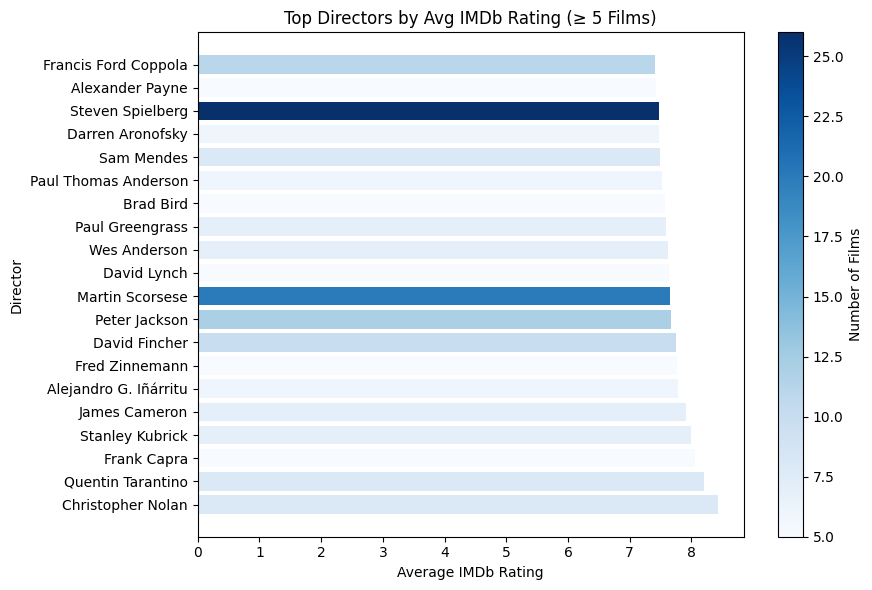

In [77]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize=(9,6))

norm = mcolors.Normalize(vmin=directors_sql["films"].min(), vmax = directors_sql["films"].max())
cmap = cm.Blues

bars = ax.barh(
    directors_sql["director"],
    directors_sql["avg_rating"],
    color=cmap(norm(directors_sql["films"]))
)

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Number of Films")

ax.set_xlabel("Average IMDb Rating")
ax.set_ylabel("Director")
ax.set_title("Top Directors by Avg IMDb Rating (≥ 5 Films)")

plt.tight_layout()
plt.savefig(fig_dir / "top_directors_avg_rating_colored_by_films.png", dpi = 200, bbox_inches = "tight")
plt.show()



## Chart 8: Directors - Quality & Quantity
The above visualization compares directors by both their average IMDb rating and their number of films. The bar length shows average audience rating. Film counts are either labeled directly or represented by color intensity. 

This dual view helps us see not only who earns the highest ratings, but also whether those ratings are based on a large amount of work or just a handful of films. 

## Data Step: Exporting Aggregates - Shown Below
To support further analysis and dashboarding (e.g., Tableau or PowerBI), I saved the key aggregates as CSV files in the `data_processed/` folder: (`agg_ratings_by_year.csv`), (`agg_ratings_by_decade.csv`), and (`agg_top_actors.csv`). 

This ensures the processed data is reusable outside the notebook. 


In [83]:
# decade aggregate
base_clip["decade"] = (base_clip[year_col] // 10) * 10
ratings_by_decade = (
    base_clip.groupby("decade", as_index=False)[[budget_col, revenue_col]]
             .mean()
             .sort_values("decade")
)


In [79]:
from pathlib import Path
out_dir = Path("../data_processed")
out_dir.mkdir(parents = True, exist_ok = True)

ratings_by_year.to_csv(out_dir / "agg_ratings_by_year.csv", index=False)
ratings_by_decade.to_csv(out_dir / "agg_ratings_by_decade.csv", index=False)
top_actors.to_csv(out_dir / "agg_top_actors.csv", index=False)
